### Touch

Имеем два набора данных. один набор размечен пользователями 28 примеров, второй набор размечан автоматически 3188.

Проверим, насколько автоматически полученные данные, хорошо описывают размеченные вручную.


In [1]:
import matplotlib.pyplot as plt
import pandas as pn
import numpy as np
%matplotlib inline  


In [2]:
file_name_user = 'data_sets/mphone_mark_users.csv'
file_name_auto = 'data_sets/mphone_mark_auto.csv'

#?pn.read_csv
columns = ["Gender","Fingerprint","TimeUpx","W","H","leng","leng_sum","speed","Force","ForceUp","Rx","Ry","varX","varY","coorXY"]
print('columns: %d' % len(columns))
df_user = pn.read_csv(file_name_user, nrows=15000, names=columns, header=1)
df_auto = pn.read_csv(file_name_auto, nrows=15000, names=columns, header=1)

columns: 15


In [3]:
df_user.describe()

,TimeUpx,W,H,leng,leng_sum,speed,Force,ForceUp,Rx,Ry,varX,varY,coorXY
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,2.700000e+01,24.000000
mean,373.723473,350.370370,662.592593,177.994823,1216.167096,0.483212,0.452393,0.002481,12.715362,12.715362,2086.672672,1.793523e+05,-0.146530
std,302.411272,20.751549,75.541257,296.190706,1043.608911,0.349451,0.499913,0.007526,15.919060,15.919060,3643.059642,4.694765e+05,0.720704
min,0.000000,320.000000,568.000000,24.745730,77.820310,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-1.000000
25%,184.715000,320.000000,568.000000,50.585805,386.837215,0.193145,0.000000,0.000000,0.000000,0.000000,113.070085,7.912361e+02,-0.830993
50%,295.000000,360.000000,667.000000,108.321700,720.271370,0.434170,0.056330,0.000000,0.659180,0.659180,538.249140,4.420800e+03,-0.164595
75%,454.083335,360.000000,740.000000,147.380345,2233.540275,0.757295,1.000000,0.000000,28.601315,28.601315,2109.694450,1.430145e+05,0.562660
max,1385.666670,375.000000,760.000000,1591.342210,3439.153620,1.155530,1.000000,0.031670,44.886670,44.886670,14559.183400,2.301841e+06,1.000000


In [4]:
df_auto.groupby('Gender')['TimeUpx'].mean()


Gender
f    798.318759
m    638.121060
Name: TimeUpx, dtype: float64

In [5]:
df_auto.groupby('Gender')['leng'].mean()

Gender
f    148.007995
m    132.999248
Name: leng, dtype: float64

In [6]:
df_auto.groupby('Gender')['Force'].mean()

Gender
f    0.874330
m    0.752413
Name: Force, dtype: float64

In [7]:
df_auto.groupby('Gender')[['Rx', 'Ry', 'coorXY','W','H']].mean()


,Rx,Ry,coorXY,W,H
Gender,,,,,
f,2.567778,2.602028,-0.066153,377.729393,646.302433
m,1.554696,1.590240,-0.069216,366.947321,637.688832


In [8]:
df_auto.groupby('Gender')['speed'].mean()

Gender
f    0.363421
m    0.383270
Name: speed, dtype: float64

In [9]:
df_auto.groupby('Gender')[['varX','varY']].mean()

,varX,varY
Gender,,
f,2035.499450,3616.160606
m,1805.778574,3208.915972


In [10]:
df_auto.describe()

,TimeUpx,W,H,leng,leng_sum,speed,Force,ForceUp,Rx,Ry,varX,varY,coorXY
count,10644.000000,10644.000000,10644.000000,10644.000000,10644.000000,10644.000000,10644.000000,10644.000000,10644.000000,10644.000000,10644.000000,10644.000000,10279.000000
mean,707.804952,371.637381,641.435635,139.527856,2694.803250,0.374636,0.805445,0.068238,1.995374,2.030354,1905.704134,3386.062032,-0.067904
std,1020.106998,82.716043,70.244010,78.123945,4787.211611,0.268494,0.364696,0.247177,3.082946,3.071559,5792.952804,4655.824619,0.545733
min,0.000000,320.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,241.000000,360.000000,640.000000,83.894675,883.082582,0.223275,1.000000,0.000000,0.000000,0.000000,115.963543,564.379192,-0.512135
50%,429.530920,360.000000,640.000000,119.652210,1658.038115,0.332900,1.000000,0.000000,0.687500,0.750000,355.246530,1725.777780,-0.092650
75%,805.145840,360.000000,640.000000,173.734630,2996.418408,0.467540,1.000000,0.000000,2.913510,2.915433,1258.786462,4351.189798,0.346570
max,32463.000000,1280.000000,1280.000000,584.874850,193153.414370,10.135830,1.587500,1.000000,42.333340,42.333340,200741.280280,83784.223260,1.000000


In [11]:
df_auto.set_index(["Gender","Fingerprint"]).count(level="Gender")

,TimeUpx,W,H,leng,leng_sum,speed,Force,ForceUp,Rx,Ry,varX,varY,coorXY
Gender,,,,,,,,,,,,,
f,4630,4630,4630,4630,4630,4630,4630,4630,4630,4630,4630,4630,4402
m,6014,6014,6014,6014,6014,6014,6014,6014,6014,6014,6014,6014,5877


In [12]:
from sklearn.preprocessing import MinMaxScaler


df_user = df_user.fillna(0)
df_auto = df_auto.fillna(0)

def map_target(cl):
    if(cl == 'f'):
        return 0
    return 1

X = df_auto[columns[2:]]
X_test =df_user[columns[2:]]
Y = df_auto['Gender'].map(map_target)
Y_test = df_user['Gender'].map(map_target) 

scaler = MinMaxScaler()
X_std = scaler.fit_transform(X)
X_test_std = scaler.transform(X_test)

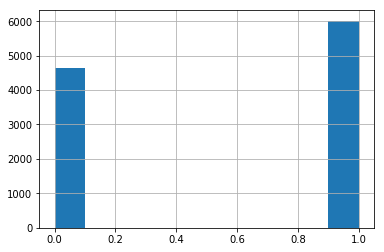

In [13]:
Y.hist()


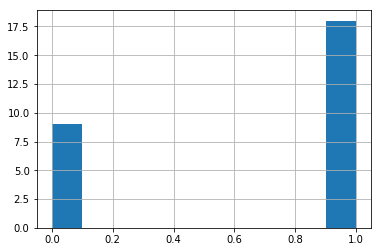

In [14]:
Y_test.hist()

#### RandomForestClassifier

In [15]:
def show_feature_importances(clf, columns_x, max_top = 10):
    results = []
    for i in range(0,len(clf.feature_importances_)):
        m = clf.feature_importances_[i]
        results.append((m, i)) 
        
    results.sort(key=lambda x: x[0], reverse=True)  
    max_top = min(max_top, len(columns_x)-1)
    for i in range(0, max_top):
        r = results[i]
        print('Key: %12s: %.4f' % (columns_x[r[1]], r[0]))

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier(n_estimators=20, max_depth=4, random_state=0)
clf.fit(X_std,Y)
print(clf.score(X_test_std, Y_test))

0.5925925925925926


In [17]:
print(type(X_std))

show_feature_importances(clf, columns[2:])

<type 'numpy.ndarray'>
Key:        Force: 0.3009
Key:           Ry: 0.1560
Key:            H: 0.1468
Key:           Rx: 0.1455
Key:      ForceUp: 0.1229
Key:            W: 0.0622
Key:         leng: 0.0166
Key:      TimeUpx: 0.0160
Key:         varX: 0.0107
Key:        speed: 0.0106


In [18]:
print( classification_report(clf.predict(X_test_std), Y_test))

             precision    recall  f1-score   support

          0       0.11      0.25      0.15         4
          1       0.83      0.65      0.73        23

avg / total       0.73      0.59      0.65        27



### DecisionTreeClassifier

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

for md in [3,4,5,6,7,None]:
    tree = DecisionTreeClassifier(max_depth=md,random_state=42) 
    tree.fit(X_std, Y)
 
    sc = tree.score(X_test_std, Y_test)
    scores = cross_val_score(tree,  X_test_std, Y_test, cv=5)
    if(md == None):
        md = -1
    print("max_depth: %d, score: %.3f, m-score: %.3f, sc: [%s]" % 
              (md, sc, scores.mean(), ', '.join(map(lambda t: '%.3f' % t,scores.tolist())))) 

max_depth: 3, score: 0.481, m-score: 0.727, sc: [0.833, 0.667, 0.833, 0.800, 0.500]
max_depth: 4, score: 0.667, m-score: 0.727, sc: [0.833, 0.667, 0.833, 0.800, 0.500]
max_depth: 5, score: 0.704, m-score: 0.727, sc: [0.833, 0.667, 0.833, 0.800, 0.500]
max_depth: 6, score: 0.704, m-score: 0.727, sc: [0.833, 0.667, 0.833, 0.800, 0.500]
max_depth: 7, score: 0.704, m-score: 0.727, sc: [0.833, 0.667, 0.833, 0.800, 0.500]
max_depth: -1, score: 0.667, m-score: 0.727, sc: [0.833, 0.667, 0.833, 0.800, 0.500]


In [20]:
show_feature_importances(tree, columns[2:])

Key:            W: 0.1414
Key:           Ry: 0.1070
Key:        Force: 0.0981
Key:         leng: 0.0820
Key:        speed: 0.0750
Key:            H: 0.0714
Key:      TimeUpx: 0.0688
Key:     leng_sum: 0.0654
Key:         varX: 0.0636
Key:           Rx: 0.0629


In [21]:
print( classification_report(tree.predict(X_test_std), Y_test))

             precision    recall  f1-score   support

          0       0.44      0.50      0.47         8
          1       0.78      0.74      0.76        19

avg / total       0.68      0.67      0.67        27



#### GradientBoostingClassifier

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(max_depth=2, n_estimators=25, random_state=42)
clf.fit(X_std,Y)
print(clf.score(X_test_std, Y_test))

0.5185185185185185


In [11]:
print (classification_report(clf.predict(X_test_std), Y_test))

              precision    recall  f1-score   support

           0       0.56      0.36      0.43        14
           1       0.50      0.69      0.58        13

   micro avg       0.52      0.52      0.52        27
   macro avg       0.53      0.52      0.51        27
weighted avg       0.53      0.52      0.51        27



In [12]:
from sklearn.model_selection import cross_val_score
#?GradientBoostingClassifier
for md in [2,3,4,5,6]:
    for ne in [10,25,50,100,200]:
        clf = GradientBoostingClassifier(max_depth=md,n_estimators=ne, random_state=42)
        clf.fit(X_std,Y)
        sc = clf.score(X_test_std, Y_test)
        scores = cross_val_score(clf,  X_test_std, Y_test, cv=5)
        print("max_depth: %d, n_estimators: %3d, score: %.3f, m-score: %.3f, sc: [%s]" % 
              (md, ne, sc, scores.mean(), ', '.join(map(lambda t: '%.3f' % t,scores.tolist()))))
        

max_depth: 2, n_estimators:  10, score: 0.556, m-score: 0.693, sc: [0.667, 0.667, 0.833, 0.800, 0.500]
max_depth: 2, n_estimators:  25, score: 0.519, m-score: 0.693, sc: [0.667, 0.667, 0.833, 0.800, 0.500]
max_depth: 2, n_estimators:  50, score: 0.519, m-score: 0.653, sc: [0.667, 0.667, 0.833, 0.600, 0.500]
max_depth: 2, n_estimators: 100, score: 0.519, m-score: 0.653, sc: [0.833, 0.667, 0.667, 0.600, 0.500]
max_depth: 2, n_estimators: 200, score: 0.667, m-score: 0.743, sc: [0.833, 0.667, 0.667, 0.800, 0.750]
max_depth: 3, n_estimators:  10, score: 0.630, m-score: 0.693, sc: [0.667, 0.667, 0.833, 0.800, 0.500]
max_depth: 3, n_estimators:  25, score: 0.630, m-score: 0.727, sc: [0.833, 0.667, 0.833, 0.800, 0.500]
max_depth: 3, n_estimators:  50, score: 0.630, m-score: 0.693, sc: [0.833, 0.667, 0.667, 0.800, 0.500]
max_depth: 3, n_estimators: 100, score: 0.667, m-score: 0.727, sc: [0.833, 0.667, 0.833, 0.800, 0.500]
max_depth: 3, n_estimators: 200, score: 0.667, m-score: 0.727, sc: [0.833

In [37]:
?GradientBoostingClassifier

####  NN keras

In [14]:
from keras import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [15]:
classifier = Sequential() 
classifier.add(Dense(128, activation='relu', kernel_initializer='random_normal', input_dim=len(X_std[0]))) 
classifier.add(Dense(128, activation='relu', kernel_initializer='random_normal')) 
classifier.add(Dense(32, activation='relu', kernel_initializer='random_normal')) 
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [16]:
classifier.fit(X_std,Y, batch_size=10, epochs=100,validation_data=(X_test_std, Y_test))

Train on 10644 samples, validate on 27 samples
Epoch 1/100
10644/10644 [==============================] - 3s 258us/step - loss: 0.6279 - acc: 0.6443 - val_loss: 1.3320 - val_acc: 0.5185
Epoch 2/100
10644/10644 [==============================] - 2s 199us/step - loss: 0.5661 - acc: 0.6847 - val_loss: 1.7928 - val_acc: 0.4444
Epoch 3/100
10644/10644 [==============================] - 2s 205us/step - loss: 0.5474 - acc: 0.7057 - val_loss: 2.1278 - val_acc: 0.4444
Epoch 4/100
10644/10644 [==============================] - 2s 205us/step - loss: 0.5316 - acc: 0.7187 - val_loss: 2.2979 - val_acc: 0.4074
Epoch 5/100
10644/10644 [==============================] - 2s 209us/step - loss: 0.5175 - acc: 0.7347 - val_loss: 2.4028 - val_acc: 0.5185
Epoch 6/100
10644/10644 [==============================] - 2s 216us/step - loss: 0.4989 - acc: 0.7518 - val_loss: 2.3947 - val_acc: 0.5185
Epoch 7/100
10644/10644 [==============================] - 2s 197us/step - loss: 0.4861 - acc: 0.7599 - val_loss: 2.434

In [17]:
y_pred= classifier.predict(X_test_std)
y_pred =(y_pred>0.5)
print classification_report(y_pred, Y_test)

SyntaxError: invalid syntax (<ipython-input-17-51f0dcd37a78>, line 3)

### Split train data

In [18]:
from sklearn.model_selection import train_test_split

X_train_std_, X_test_std_, y_train_std_, y_test_std_ = train_test_split(X_std, Y, test_size=0.33, random_state=42)
print(len(X_train_std_))

7131


### GradientBoostingClassifier

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(max_depth=4, n_estimators=100, random_state=42)
clf.fit(X_train_std_,y_train_std_)
print(clf.score(X_test_std_, y_test_std_))
#print(clf.score(X_test_std, Y_test))

0.8144036436094506


In [20]:
from sklearn.model_selection import cross_val_score
#?GradientBoostingClassifier
for md in [2,3,4,5,6]:
    for ne in [10,25,50,100,200]:
        clf = GradientBoostingClassifier(max_depth=md,n_estimators=ne, random_state=42)
        clf.fit(X_train_std_,y_train_std_)
        scores = cross_val_score(clf,  X_test_std_, y_test_std_, cv=5)
        print("max_depth: %d, n_estimators: %3d, score: %.3f, sc: [%s]" % 
              (md, ne, clf.score(X_test_std_, y_test_std_), ', '.join(map(lambda t: '%.3f' % t,scores.tolist()))))

max_depth: 2, n_estimators:  10, score: 0.687, sc: [0.669, 0.698, 0.688, 0.653, 0.685]
max_depth: 2, n_estimators:  25, score: 0.722, sc: [0.697, 0.738, 0.687, 0.698, 0.709]
max_depth: 2, n_estimators:  50, score: 0.779, sc: [0.771, 0.758, 0.698, 0.721, 0.738]
max_depth: 2, n_estimators: 100, score: 0.775, sc: [0.808, 0.774, 0.764, 0.735, 0.769]
max_depth: 2, n_estimators: 200, score: 0.798, sc: [0.805, 0.765, 0.785, 0.750, 0.769]
max_depth: 3, n_estimators:  10, score: 0.762, sc: [0.693, 0.751, 0.744, 0.735, 0.739]
max_depth: 3, n_estimators:  25, score: 0.792, sc: [0.815, 0.798, 0.760, 0.747, 0.745]
max_depth: 3, n_estimators:  50, score: 0.807, sc: [0.822, 0.804, 0.807, 0.740, 0.786]
max_depth: 3, n_estimators: 100, score: 0.814, sc: [0.811, 0.809, 0.805, 0.758, 0.793]
max_depth: 3, n_estimators: 200, score: 0.816, sc: [0.815, 0.811, 0.794, 0.752, 0.800]
max_depth: 4, n_estimators:  10, score: 0.777, sc: [0.804, 0.792, 0.768, 0.748, 0.759]
max_depth: 4, n_estimators:  25, score: 0.8

### NN Keras

In [21]:
from keras import Sequential
from keras.layers import Dense

In [22]:
classifier = Sequential() 
classifier.add(Dense(128, activation='relu', kernel_initializer='random_normal', input_dim=len(X_std[0]))) 
classifier.add(Dense(128, activation='relu', kernel_initializer='random_normal')) 
classifier.add(Dense(32, activation='relu', kernel_initializer='random_normal')) 
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [34]:
classifier.fit(X_train_std_,y_train_std_, batch_size=10, epochs=10,validation_data=(X_test_std_, y_test_std_))

Train on 7131 samples, validate on 3513 samples
Epoch 1/10
7131/7131 [==============================] - 2s 266us/step - loss: 0.3916 - acc: 0.8114 - val_loss: 0.4596 - val_acc: 0.7945
Epoch 2/10
7131/7131 [==============================] - 2s 252us/step - loss: 0.3896 - acc: 0.8162 - val_loss: 0.4463 - val_acc: 0.8061
Epoch 3/10
7131/7131 [==============================] - 2s 256us/step - loss: 0.3876 - acc: 0.8150 - val_loss: 0.4538 - val_acc: 0.7993
Epoch 4/10
7131/7131 [==============================] - 2s 236us/step - loss: 0.3885 - acc: 0.8155 - val_loss: 0.4546 - val_acc: 0.8002
Epoch 5/10
7131/7131 [==============================] - 2s 237us/step - loss: 0.3872 - acc: 0.8145 - val_loss: 0.4422 - val_acc: 0.8076
Epoch 6/10
7131/7131 [==============================] - 2s 226us/step - loss: 0.3827 - acc: 0.8153 - val_loss: 0.4472 - val_acc: 0.8053
Epoch 7/10
7131/7131 [==============================] - 2s 238us/step - loss: 0.3785 - acc: 0.8208 - val_loss: 0.4566 - val_acc: 0.8033


In [33]:
y_pred= classifier.predict(X_test_std_)
y_pred =(y_pred>0.5)
print( classification_report(y_pred, y_test_std_))

              precision    recall  f1-score   support

       False       0.72      0.82      0.76      1356
        True       0.87      0.80      0.83      2157

   micro avg       0.80      0.80      0.80      3513
   macro avg       0.79      0.81      0.80      3513
weighted avg       0.81      0.80      0.81      3513

